## 환경설정 
### - pip install mglearn
### - preamble 안되면 https://github.com/rickiepark/introduction_to_ml_with_python  파일 클론
### - mglearn 폴더와 preamble.py 파일을 source 폴더에 넣어주기
### - 학습과정에서 이미지 로딩 에 관련한 환경을 설정해주는것

In [85]:
from preamble import * 
%matplotlib inline

In [86]:
import numpy as np 
x1 = np.array([1,2,3])
print("x1:\n", x1)
print(x1.shape)
#어레이의 행,렬 요소 갯수 리턴
print(x1.ndim)
#몇 차원인지 리턴

x1:
 [1 2 3]
(3,)
1


In [87]:
x2 =np.array([[1,2,3], [4,5,6]])
print("x2:\n", x2)
print(x2.shape)
#어레이의 행,렬 요소 갯수 리턴
print(x2.ndim)
#몇 차원인지 리턴

x2:
 [[1 2 3]
 [4 5 6]]
(2, 3)
2


# Scipy

In [88]:
A = np.zeros((2,2))
B = np.ones((2,2))
C = np.eye(2)

print(A)
print(B)
print(C)

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[1. 0.]
 [0. 1.]]


In [89]:
from scipy import sparse

#대각선 원소는 1이고 나머지 는 0인 2차원 배열 -> numpy.eye(행수)
eye = np.eye(4)
print("NumPy 배열 :\n", eye)
print(eye.shape)


NumPy 배열 :
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
(4, 4)


In [90]:
#numpy 배열을 csr 포맷의SciPy 희박 행렬로 변환합니다.
# 희박행렬(sparse matrix)이란? 2차원 배열로 이루어진 행렬 중 대부분의 항의 값이 0으로 구성된 행렬을 말한다. ->numpy.one으로 생성가능

# car_matrix(eye행렬) 매써드는 희박 행렬 중, 0이 아닌 원소의 위치와 원소값을 리턴해주는 메써드이다.

sparse_matrix = sparse.csr_matrix(eye)
print("Scipy의 csr 행렬 :\n", sparse_matrix)

# 결과값은 0행0렬 -> 1.0의 원소, 1행 1열 -> 1.0의 행렬 ~~~

Scipy의 csr 행렬 :
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [91]:
data = np.ones(4)
#1 원소로 채워질 4개의 열을 가진 data

data1 = np.ones((4,4))
#1 원소로 채워질 4개의 열과 4개의 행을 가진 data1

print(data)
print(data1)
row_indices = np.arange(4)
col_indices = np.arange(4)
print(row_indices, col_indices)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("\nCOO표현 :\n", eye_coo)
#coo_matrix로도 표현 가능


[1. 1. 1. 1.]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[0 1 2 3] [0 1 2 3]

COO표현 :
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


(100,)


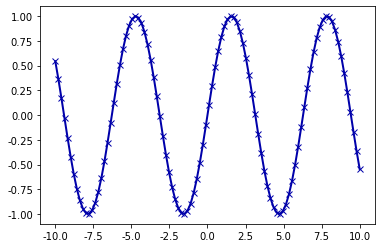

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt

# -10에서 10까지의 랜덤으로 추출된 float 원소들을  100개로 배열한 배열을 생성합니다.
x = np.linspace(-10,10,100)
print(x.shape)

#사인 함수를 사용해 y배열을 생성합니다.
y = np.sin(x)
plt.plot(x,y, marker = "x")


In [93]:
import pandas as pd
#회원 정보가 들어간 간단한 데이터 셋 생성해보기 

data = {'Name' : ['John', 'Anna', 'Peter', 'linda'],
       'Location' : ['New york', 'Paris', 'Berlin', 'London'],
       'Age' : [24,13,53,33]}

data_pandas = pd.DataFrame(data)

In [94]:
display(data_pandas[data_pandas['Age'] > 30])
#IPython.display는 주피터 노트븍에서 dataframe 을 미려하게 출력해줌

,Name,Location,Age
2,Peter,Berlin,53
3,linda,London,33


## mglearn

## 소프트웨어 버전 확인해보기

In [95]:
import sys
print('Python 버전:', sys.version)

Python 버전: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


In [96]:
print('pandas 버전 : ',pd.__version__)

pandas 버전 :  1.0.4


In [97]:
import matplotlib
print('matplotlib버전 : ',matplotlib.__version__)

matplotlib버전 :  3.2.1


In [98]:
print('numpy 버전 : ', np.__version__)

numpy 버전 :  1.18.4


In [99]:
import scipy as sp
print('SciPy 버전 : ', sp.__version__)

SciPy 버전 :  1.1.0


In [100]:
import sklearn
print('scikit_learn 버전 : ', sklearn.__version__)

scikit_learn 버전 :  0.19.2


# 첫 번째 어플리케이션 : iris Dataset

## - mglearn 에서 머신러닝 공부에 사용하는 여러 data set을 제공
## - 꽃잎의 폭/길이, 꽃받침의 폭/길이를 측정하고, 붓꽃의 품종을 분류한 데이터가 있다.
## - 측정값을 이용해 꽃을 분류하고자 함

* 붓꽃 데이터 피처 - Sepal lengnth, Sepal width, Petal length, Petal width

## - 데이터 셋 분리 -> 모델학습 -> 예측수행 -> 평가 단계로 수행

## 1. 데이터 적재

In [101]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [102]:
print("iris 데이터셋의 키 :\n", iris_dataset.keys())

iris 데이터셋의 키 :
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [103]:
print(iris_dataset['DESCR'][:193] + "\n...")
#DESCR 키에는 데이터 셋에 대한 간략한 설명이 포함됨

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [104]:
print('타깃의 이름 : ', iris_dataset['target_names'])
# 우리가 예측하고자 하는 붓꽃 품종의 이름을 target_names에 저장되어있다

타깃의 이름 :  ['setosa' 'versicolor' 'virginica']


In [105]:
print('특성의 이름 : \n', iris_dataset['feature_names'])
#각 feature 표현

특성의 이름 : 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [106]:
# 실제 데이터는 target 과 data 필드에 있으며, data필드는 꽃잎의 길이와 폭, 꽃받침의 길이와 폭을 수치 값으로 가지고 있는 Numpy 배열
print('data의 타입 :\n ', type(iris_dataset['data']))
print('\n\ndata 내용 : \n %s'%(iris_dataset['feature_names']),'\n', iris_dataset['data'][:4])
# 일부만 가져왔을때의 data 형식은 다음과 같다

print("\n\ndata의 크기 : ", iris_dataset['data'].shape)
# 150행, 4열의 배열에 data가 저장되어있다.

data의 타입 :
  <class 'numpy.ndarray'>


data 내용 : 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


data의 크기 :  (150, 4)


In [107]:
# target 배열은 샘플 붓꽃의 품종을 담은 Numpy 배열이다.
print('target의 타입 :', type(iris_dataset['target']))
print('\ntarget의 크기 :', iris_dataset['target'].shape)
print('각 타겟의 이름 : ', iris_dataset['target_names'])
print('\n타깃의 내용 : \n', iris_dataset['target'])
#타겟의 이름과, 내용을 매칭할때 0 : setosa, 1: versicolor, 2 :virginica 이다.

target의 타입 : <class 'numpy.ndarray'>

target의 크기 : (150,)
각 타겟의 이름 :  ['setosa' 'versicolor' 'virginica']

타깃의 내용 : 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [108]:
# 붓꿏 데이터 셋을 더 자세히 보기 위해 DataFrame으로 변환해보자
# 데이터 별로 저장된 붓꽃의 품종 컬럼인 target을 label 컬럼으로 가져와 주면 된다.
iris_data = iris_dataset.data
iris_df = pd.DataFrame(data = iris_data,
                      columns = iris_dataset.feature_names)
iris_df['label'] = iris_dataset.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 2. 훈련 데이터와 테스트 데이터 
* 150개의 붓꽃 데이터를 두그룹으로 나누고,
* 훈련데이터와 테스트 데이터로 나눈다.
* 모델의 성능을 측정하기 위해 새 데이터 모델에 적용해야하기 때문이고,
* scikit_learn 은 데이터셋을 섞어서 나눠주는 train_test_split함수를 제공한다.
* 이 함수는 전체 행중 75%를 훈련셋으로 뽑고, 나머지 25% 가 테스트셋이 된다.
* scikit_learn 에서 데이터는 대문자 X로 표시되고, 레이블(품종) 은 소문자 y로 표기한다. 

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

In [110]:
print('X_train의 크기 :', X_train.shape)
print('y_train의 크기 :', y_train.shape)
print('X_test의 크기 :', X_test.shape)
print('y_test의 크기 :', y_test.shape)
#훈련데이터는 iris_dataset.data의 약 75프로, 테스터 데이터는 약 25%로 할당된다. 

X_train의 크기 : (112, 4)
y_train의 크기 : (112,)
X_test의 크기 : (38, 4)
y_test의 크기 : (38,)


## 2-1. 가장 먼저 할일 : 데이터 살펴보기
### - 머신 러닝 모델을 만들기 전, 머신러닝이 없이도 풀수있는지, 필요한 정보가 누락되진 않았는지 데이터를 조사해보는것이 좋다

In [111]:
#X_train 데이터를 사용해 데이터 프레임을 만들고, 열의 이름을 feature_names에 있는 문자열을 사용하기
iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)

In [112]:
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
...,...,...,...,...
107,4.9,3.1,1.5,0.1
108,6.3,2.9,5.6,1.8
109,5.8,2.7,4.1,1.0
110,7.7,3.8,6.7,2.2


### 모든 특성을 짝지어 만드는 산점도 행렬을 사용해, 붓꽃의 경우과 같이 4가지 특성의 관계를 표현하는 데에 효과적

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018015AB9B00>,
      dtype=object)

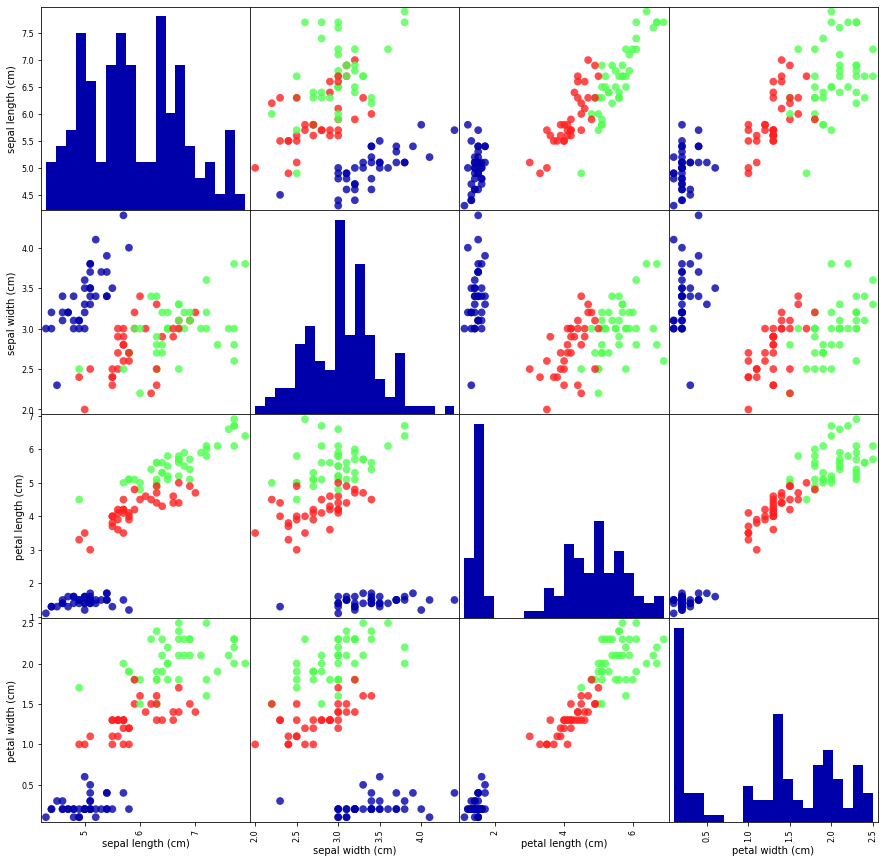

In [113]:
pd.plotting.scatter_matrix(iris_dataframe, c = y_train, figsize = (15,15), marker = 'o', hist_kwds={'bins':20},
                          s = 60, alpha = .8, cmap = mglearn.cm3) 

 ### - 위 그림의 대각선에 위치한 그래프는 각 특성들의 히스토그램이다.
 ### - 그래프로 미루어 보았을때, 세클래스가 꽃잎,꽃받침의 측정값에 따라 비교적 잘구분됨을 알수있었다.

## 3. 첫 번째 머신러닝 모델 : k-최근접 이웃 알고리즘

* k는 가장 가까운 이웃 하나가 아니라, 훈련데이터에서 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다는 뜻으로,
* 이 이웃들의 클래스중 가장 빈도가 높은 클래스를 예측값으로 사 용하는 알고리즘

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
# 모델을 사용하기 위해선 먼저 클래스를 임포트하고, 클래스로부터 객체를 만들어야 한다. 
# 가장중요한 변수는 이웃의 갯수로 , 이 챕터에선 1로 지정하여 사용해보겠다. 

* knn 객체는 훈련 데이터로 모델을 만들고, 새로운 데이터 포인트에 대해 예측하는 알고리즘을 캡슐화 한것이며, 
* 또한 알고리즘이 훈련 데이터로부터 추출한 정보를 담고있다.

In [129]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

* fit 메서드는 knn  객체 자체를 변경시키고 반환하며, 우리가 지정한 이웃의 갯수만 1개임을 확인하고 남은 값들은 기본값이다.

## 4. 예측하기

In [130]:
X_new = np.array([[5,2.9,1,0.2]])
print(X_new.shape)

(1, 4)


## - x_train 데이터를 기준으로 훈련된 knn 객체를 이용해 새로운 x_new 데이터에 대해 예측하여 본다.

In [131]:
prediction = knn.predict(X_new)
print('예측결과 :', prediction)
print('예측된 타겟의 이름:', iris_dataset['target_names'][prediction])

예측결과 : [0]
예측된 타겟의 이름: ['setosa']


* setosa 품종을 의미하는 클래스 0 으로 예측이 되었다 하지만 신뢰성은? 이 샘플의 정확한 품종을 모른다는 사실이 모델의 구축에서 중요한 의미를 지닌다

## 5. 모델 평가하기

* 앞서 만든 테스트 셋트를 사용하여, 예측을 함으로써 실제 정확한 품종과 얼마나 정확도가 높냐로 모델을 평가하게 된다.

In [132]:
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값: \n', y_pred)

테스트 세트에 대한 예측값: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


### - 실제 품종정보가 든 y_test와, 테스트 셋트에 대한 예측값이 든 y_pred의 유사성 비교

In [133]:
print('테스트 세트의 정확도 :{:.2f}'.format(np.mean(y_pred == y_test)))

테스트 세트의 정확도 :0.97


* knn객체의 score 메서드로도 테스트 세트의 정확도를 계산할 수 있다.

In [142]:
print('테스트 세트의 정확도 :{:.4f}'.format(knn.score(X_test,y_test)))

테스트 세트의 정확도 :0.9737


## - 이 결과, 이 knn 모델은 테스트 세트에 포함된 붓꽃중 97%의 품종을 정확히 맞혔다는 뜻이다.